Semua library berhasil diimpor.

Memuat dataset Iris...
Dataset berhasil dimuat.
Fitur (X) head:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y) head:
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Nama-nama spesies: ['setosa' 'versicolor' 'virginica']

Melakukan Eksplorasi Data Sederhana (EDA)...

Informasi Dataset X:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal le

/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Data bunga: [5.1 3.5 1.4 0.2] -> Prediksi Spesies: setosa
Data bunga: [6.7 3.  5.2 2.3] -> Prediksi Spesies: virginica
Data bunga: [5.9 3.  4.2 1.5] -> Prediksi Spesies: versicolor

Menyimpan model yang telah dilatih...
Model berhasil disimpan sebagai iris_knn_model.joblib

--- Proyek Selesai ---

Jika plot tidak muncul otomatis, mungkin Anda perlu menjalankan plt.show() setelah setiap plot atau di akhir skrip.


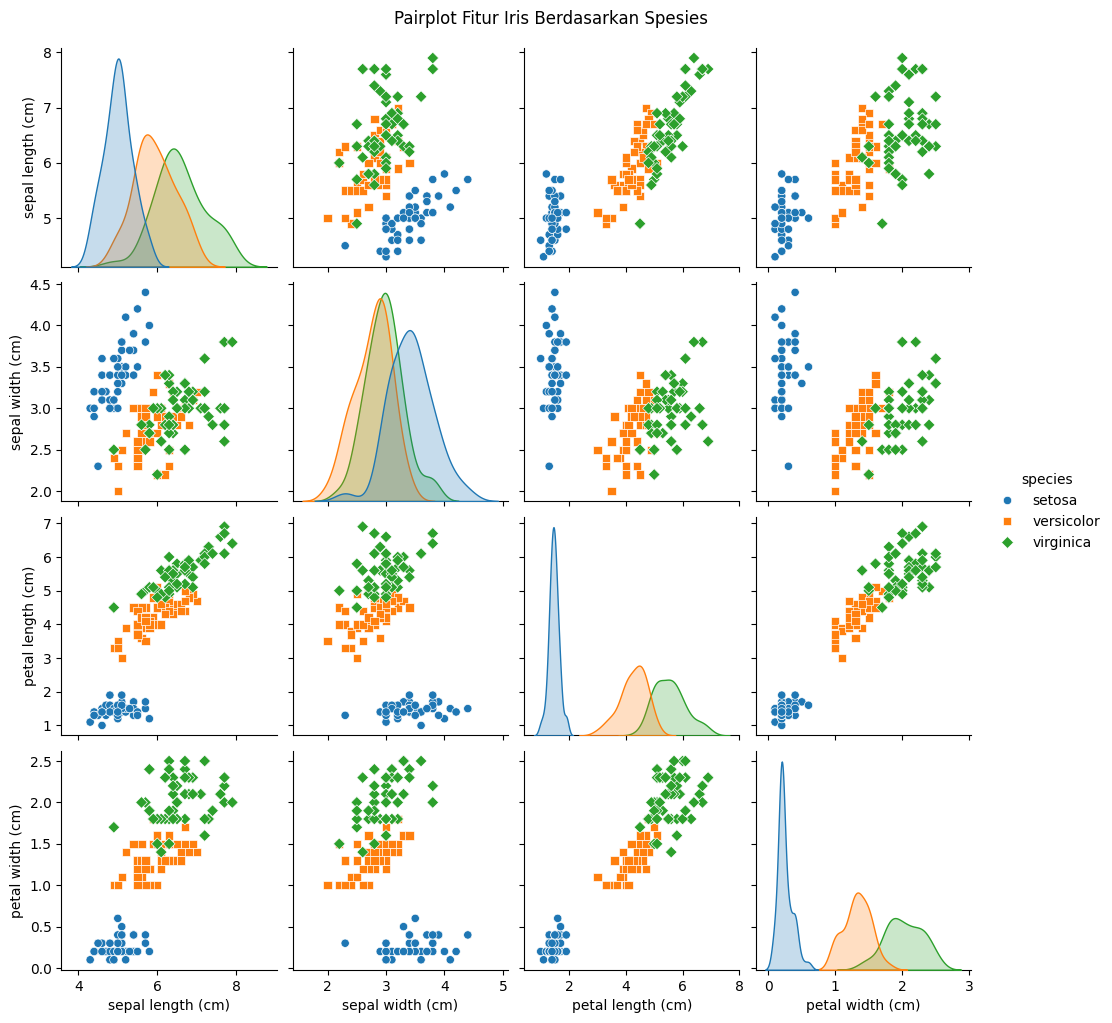

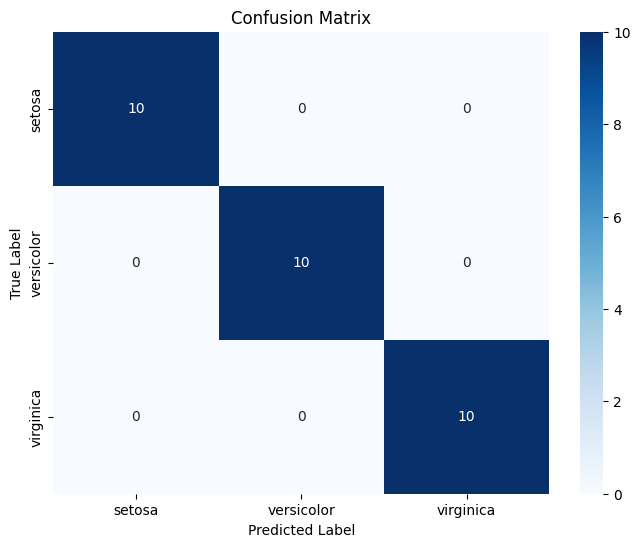

In [1]:


# 1. Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Opsional, tapi baik untuk beberapa model
from sklearn.neighbors import KNeighborsClassifier # Model K-Nearest Neighbors
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris # Dataset Iris bawaan scikit-learn
import joblib # Untuk menyimpan dan memuat model

print("Semua library berhasil diimpor.")

# 2. Memuat Dataset
print("\nMemuat dataset Iris...")
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target, name='species')

# Mengubah target menjadi nama spesies untuk kemudahan interpretasi
species_names = iris.target_names
y_named = y.map({i: name for i, name in enumerate(species_names)})

print("Dataset berhasil dimuat.")
print("Fitur (X) head:\n", X.head())
print("\nTarget (y) head:\n", y_named.head())
print("\nNama-nama spesies:", species_names)

# 3. Eksplorasi Data Sederhana (EDA - Exploratory Data Analysis)
print("\nMelakukan Eksplorasi Data Sederhana (EDA)...")
print("\nInformasi Dataset X:\n")
X.info()
print("\nStatistik Deskriptif X:\n", X.describe())
print("\nDistribusi kelas target (y):\n", y_named.value_counts())

# Visualisasi sederhana (opsional, tapi sangat membantu)
print("\nMembuat visualisasi pairplot (mungkin butuh beberapa detik)...")
# Menggabungkan X dan y_named untuk pairplot
df_full = pd.concat([X, y_named], axis=1)
sns.pairplot(df_full, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot Fitur Iris Berdasarkan Spesies", y=1.02)
# plt.show() # Tampilkan plot jika menjalankan secara interaktif

# 4. Memisahkan Data menjadi Data Latih dan Data Uji
print("\nMemisahkan data menjadi data latih (80%) dan data uji (20%)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, # Gunakan y numerik untuk training
    test_size=0.2,  # 20% data untuk pengujian
    random_state=42, # Untuk reproduktifitas hasil
    stratify=y      # Penting untuk klasifikasi agar proporsi kelas sama di train & test
)
print(f"Ukuran X_train: {X_train.shape}, Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}, Ukuran y_test: {y_test.shape}")

# 5. (Opsional) Standardisasi Fitur
# Beberapa algoritma (seperti KNN, SVM, Neural Network) bekerja lebih baik dengan fitur yang diskalakan.
# Untuk Decision Tree atau Random Forest, ini kurang krusial.
print("\n(Opsional) Melakukan standardisasi fitur...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Untuk proyek ini, kita akan gunakan X_train dan X_test yang tidak diskalakan
# karena KNN dengan metrik Euclidean standar masih bisa bekerja baik pada Iris.
# Jika ingin menggunakan yang diskalakan: model.fit(X_train_scaled, y_train)

# 6. Memilih dan Melatih Model
# Kita akan menggunakan K-Nearest Neighbors (KNN)
print("\nMemilih dan melatih model K-Nearest Neighbors (KNN)...")
k = 3 # Jumlah tetangga yang dipertimbangkan
model = KNeighborsClassifier(n_neighbors=k)

# Melatih model menggunakan data latih
model.fit(X_train, y_train) # Jika pakai scaling: model.fit(X_train_scaled, y_train)
print(f"Model KNN dengan k={k} berhasil dilatih.")

# 7. Melakukan Prediksi pada Data Uji
print("\nMelakukan prediksi pada data uji...")
y_pred = model.predict(X_test) # Jika pakai scaling: model.predict(X_test_scaled)

# Mengubah prediksi numerik kembali ke nama spesies untuk laporan
y_pred_named = pd.Series(y_pred).map({i: name for i, name in enumerate(species_names)})
y_test_named = y_test.map({i: name for i, name in enumerate(species_names)})

print("Prediksi selesai.")
# print("Contoh hasil prediksi:\n", y_pred_named.head())
# print("Nilai aktual:\n", y_test_named.head())


# 8. Mengevaluasi Model
print("\nMengevaluasi performa model...")
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

print("\nLaporan Klasifikasi:")
# Gunakan y_test dan y_pred yang numerik untuk classification_report,
# tapi berikan target_names untuk label yang mudah dibaca.
print(classification_report(y_test, y_pred, target_names=species_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=species_names, yticklabels=species_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# plt.show() # Tampilkan plot jika menjalankan secara interaktif

# 9. Membuat Prediksi pada Data Baru (Contoh)
print("\nMembuat prediksi pada data baru (contoh)...")
# Contoh data baru: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
new_flower_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Seharusnya Setosa
                            [6.7, 3.0, 5.2, 2.3],  # Seharusnya Virginica
                            [5.9, 3.0, 4.2, 1.5]]) # Seharusnya Versicolor

# Jika menggunakan scaler, data baru juga perlu di-transform
# new_flower_data_scaled = scaler.transform(new_flower_data)
# predictions_new = model.predict(new_flower_data_scaled)

predictions_new = model.predict(new_flower_data)
predicted_species_new = [species_names[p] for p in predictions_new]

for i, data in enumerate(new_flower_data):
    print(f"Data bunga: {data} -> Prediksi Spesies: {predicted_species_new[i]}")

# 10. Menyimpan Model (Opsional)
print("\nMenyimpan model yang telah dilatih...")
model_filename = 'iris_knn_model.joblib'
joblib.dump(model, model_filename)
print(f"Model berhasil disimpan sebagai {model_filename}")

# (Opsional) Memuat Model yang Telah Disimpan
# loaded_model = joblib.load(model_filename)
# print(f"\nModel {model_filename} berhasil dimuat.")
# test_prediction_loaded = loaded_model.predict(X_test) # atau X_test_scaled
# print(f"Akurasi model yang dimuat: {accuracy_score(y_test, test_prediction_loaded)*100:.2f}%")

print("\n--- Proyek Selesai ---")
print("\nJika plot tidak muncul otomatis, mungkin Anda perlu menjalankan plt.show() setelah setiap plot atau di akhir skrip.")
plt.show() # Tampilkan semua plot yang telah dibuat
